In [5]:
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, LSTM, Flatten, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import module
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [6]:
countriesOfInterest = {"HK", "JP", 'ZA', 'TN', 'TR', 'GB', 'MX', 'US', 'CO', 'EC', 'AU', 'NZ'}
countriesOfInterest = ["ZA", "EG", "TW", "JP", "DK", "FI", "US", "CA", "AU", "NZ", "BR", "CO"]
#countriesOfInterest = list(countriesOfInterest & {"ZA", "EG", "TW", "JP", "DK", "FI", "US", "CA", "AU", "NZ", "BR", "CO"})

enc = OneHotEncoder()
enc.fit(np.array(countriesOfInterest).reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [7]:
seconds = 10
samplerate = 100
train_x, train_labels, val_x, val_labels, class_weights = module.getSamples(1, 1, seconds, samplerate, countriesOfInterest,
               enc, verbose = 0)

### Fit model

In [8]:
model = keras.Sequential()
model.add(LSTM(16, 
               input_shape=(train_x.shape[1], train_x.shape[2]), 
               return_sequences = False,
              # recurrent_dropout = .5,
               kernel_regularizer=regularizers.l2(0.01),
              ))
model.add(Dropout(.5))
model.add(BatchNormalization())
model.add(Dense(len(enc.categories_[0]), activation= "softmax", kernel_regularizer=regularizers.l2(0.01)))
adam = keras.optimizers.Adam(lr=0.001)
model.compile(loss = "categorical_crossentropy", optimizer= adam, metrics=["acc"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                2688      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
Total params: 2,854
Trainable params: 2,822
Non-trainable params: 32
_________________________________________________________________
None


[200. 200. 200. 200. 200. 200.]
Train on 1200 samples, validate on 300 samples
Epoch 1/5
1200/1200 [==============================] - 4s 3ms/sample - loss: 2.7474 - acc: 0.1550 - val_loss: 2.3661 - val_acc: 0.1800
Epoch 2/5
1200/1200 [==============================] - 3s 3ms/sample - loss: 2.7647 - acc: 0.1692 - val_loss: 2.3572 - val_acc: 0.1767
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/sample - loss: 2.7334 - acc: 0.1567 - val_loss: 2.3546 - val_acc: 0.1933
Epoch 4/5
1200/1200 [==============================] - 3s 3ms/sample - loss: 2.7517 - acc: 0.1617 - val_loss: 2.3461 - val_acc: 0.1900
Epoch 5/5
300/300 [==============================] - 0s 916us/sample


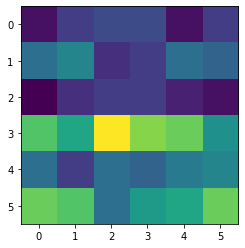

1200/1200 [==============================] - 1s 472us/sample


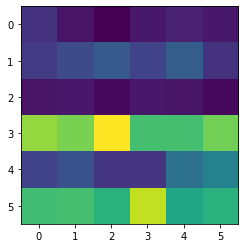

[200. 200. 200. 200. 200. 200.]
Train on 1200 samples, validate on 300 samples
Epoch 6/10
1200/1200 [==============================] - 5s 4ms/sample - loss: 2.7526 - acc: 0.1733 - val_loss: 2.3415 - val_acc: 0.1400
Epoch 7/10
1200/1200 [==============================] - 4s 3ms/sample - loss: 2.7284 - acc: 0.1758 - val_loss: 2.3377 - val_acc: 0.1467
Epoch 8/10
1200/1200 [==============================] - 4s 3ms/sample - loss: 2.7035 - acc: 0.1783 - val_loss: 2.3340 - val_acc: 0.1467
Epoch 9/10
1200/1200 [==============================] - 4s 3ms/sample - loss: 2.7071 - acc: 0.1558 - val_loss: 2.3298 - val_acc: 0.1500
Epoch 10/10
300/300 [==============================] - 0s 1ms/sample


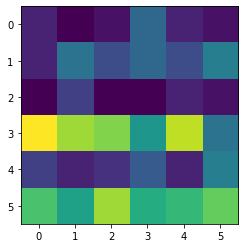

1200/1200 [==============================] - 1s 478us/sample


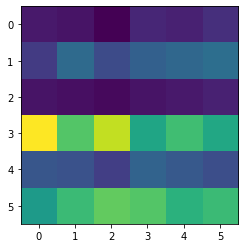

[200. 200. 200. 200. 200. 200.]
Train on 1200 samples, validate on 300 samples
Epoch 11/15
1200/1200 [==============================] - 5s 4ms/sample - loss: 2.7223 - acc: 0.1417 - val_loss: 2.3792 - val_acc: 0.1567
Epoch 12/15
1200/1200 [==============================] - 4s 3ms/sample - loss: 2.6763 - acc: 0.1567 - val_loss: 2.3770 - val_acc: 0.1567
Epoch 13/15
1200/1200 [==============================] - 4s 4ms/sample - loss: 2.6745 - acc: 0.1633 - val_loss: 2.3713 - val_acc: 0.1500
Epoch 14/15
1200/1200 [==============================] - 4s 4ms/sample - loss: 2.6626 - acc: 0.1667 - val_loss: 2.3669 - val_acc: 0.1467
Epoch 15/15
300/300 [==============================] - 0s 1ms/sample


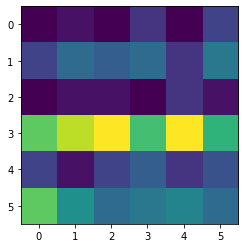

1200/1200 [==============================] - 1s 491us/sample


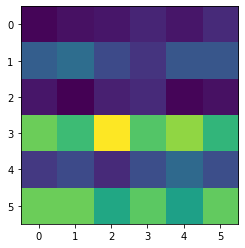

[200. 200. 200. 200. 200. 200.]
Train on 1200 samples, validate on 300 samples
Epoch 16/20
1200/1200 [==============================] - 6s 5ms/sample - loss: 2.6158 - acc: 0.1850 - val_loss: 2.3666 - val_acc: 0.1200
Epoch 17/20
1200/1200 [==============================] - 5s 4ms/sample - loss: 2.6194 - acc: 0.1725 - val_loss: 2.3652 - val_acc: 0.1233
Epoch 18/20
1200/1200 [==============================] - 5s 4ms/sample - loss: 2.5926 - acc: 0.1642 - val_loss: 2.3645 - val_acc: 0.1167
Epoch 19/20
1200/1200 [==============================] - 5s 4ms/sample - loss: 2.5671 - acc: 0.1942 - val_loss: 2.3635 - val_acc: 0.1167
Epoch 20/20
300/300 [==============================] - 0s 921us/sample


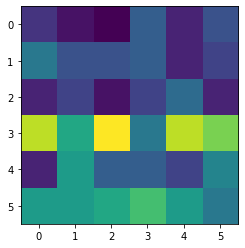

1200/1200 [==============================] - 1s 558us/sample


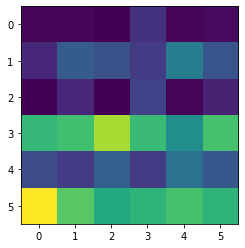

[200. 200. 200. 200. 200. 200.]
Train on 1200 samples, validate on 300 samples
Epoch 21/25
1200/1200 [==============================] - 7s 5ms/sample - loss: 2.6355 - acc: 0.1550 - val_loss: 2.3384 - val_acc: 0.1600
Epoch 22/25
1200/1200 [==============================] - 5s 4ms/sample - loss: 2.6145 - acc: 0.1492 - val_loss: 2.3389 - val_acc: 0.1633
Epoch 23/25
1200/1200 [==============================] - 5s 5ms/sample - loss: 2.6134 - acc: 0.1667 - val_loss: 2.3387 - val_acc: 0.1600
Epoch 24/25
1200/1200 [==============================] - 6s 5ms/sample - loss: 2.5880 - acc: 0.1767 - val_loss: 2.3381 - val_acc: 0.1633
Epoch 25/25
300/300 [==============================] - 0s 997us/sample


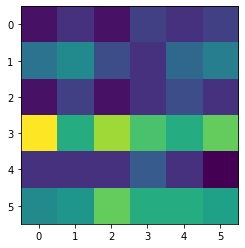

1200/1200 [==============================] - 1s 540us/sample


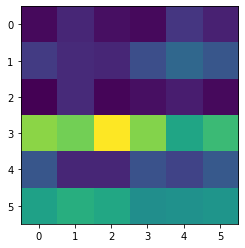

[200. 200. 200. 200. 200. 200.]
Train on 1200 samples, validate on 300 samples
Epoch 26/30
1200/1200 [==============================] - 7s 6ms/sample - loss: 2.6029 - acc: 0.1608 - val_loss: 2.3533 - val_acc: 0.1467
Epoch 27/30
1200/1200 [==============================] - 6s 5ms/sample - loss: 2.6265 - acc: 0.1633 - val_loss: 2.3522 - val_acc: 0.1500
Epoch 28/30
1200/1200 [==============================] - 6s 5ms/sample - loss: 2.5961 - acc: 0.1700 - val_loss: 2.3512 - val_acc: 0.1500
Epoch 29/30
1200/1200 [==============================] - 6s 5ms/sample - loss: 2.6427 - acc: 0.1400 - val_loss: 2.3511 - val_acc: 0.1567
Epoch 30/30
300/300 [==============================] - 0s 973us/sample


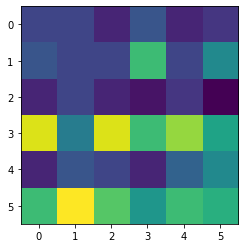

1200/1200 [==============================] - 1s 571us/sample


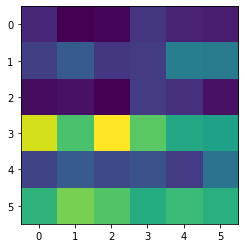

[200. 200. 200. 200. 200. 200.]
Train on 1200 samples, validate on 300 samples
Epoch 31/35
1200/1200 [==============================] - 7s 6ms/sample - loss: 2.5939 - acc: 0.1767 - val_loss: 2.3429 - val_acc: 0.1667
Epoch 32/35
1200/1200 [==============================] - 6s 5ms/sample - loss: 2.6067 - acc: 0.1683 - val_loss: 2.3421 - val_acc: 0.1667
Epoch 33/35
1200/1200 [==============================] - 6s 5ms/sample - loss: 2.5996 - acc: 0.1592 - val_loss: 2.3416 - val_acc: 0.1667
Epoch 34/35
1200/1200 [==============================] - 6s 5ms/sample - loss: 2.5819 - acc: 0.1692 - val_loss: 2.3414 - val_acc: 0.1667
Epoch 35/35
300/300 [==============================] - 0s 1ms/sample


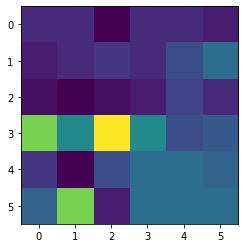

1200/1200 [==============================] - 1s 629us/sample


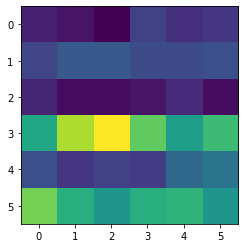

[200. 200. 200. 200. 200. 200.]
Train on 1200 samples, validate on 300 samples
Epoch 36/40
1200/1200 [==============================] - 8s 7ms/sample - loss: 2.6255 - acc: 0.1633 - val_loss: 2.2887 - val_acc: 0.2100
Epoch 37/40
1200/1200 [==============================] - 7s 6ms/sample - loss: 2.5664 - acc: 0.1700 - val_loss: 2.2885 - val_acc: 0.2100
Epoch 38/40
1200/1200 [==============================] - 7s 6ms/sample - loss: 2.6003 - acc: 0.1692 - val_loss: 2.2881 - val_acc: 0.2100
Epoch 39/40
1200/1200 [==============================] - 7s 6ms/sample - loss: 2.5688 - acc: 0.1867 - val_loss: 2.2878 - val_acc: 0.2100
Epoch 40/40
300/300 [==============================] - 0s 1ms/sample


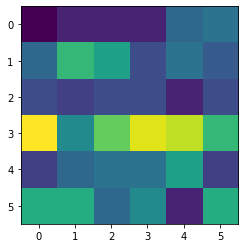

1200/1200 [==============================] - 1s 612us/sample


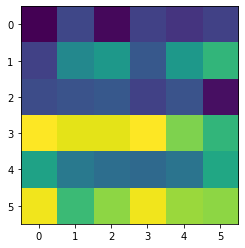

[200. 200. 200. 200. 200. 200.]
Train on 1200 samples, validate on 300 samples
Epoch 41/45
1200/1200 [==============================] - 8s 7ms/sample - loss: 2.6416 - acc: 0.1533 - val_loss: 2.3651 - val_acc: 0.1467
Epoch 42/45
1200/1200 [==============================] - 7s 6ms/sample - loss: 2.6457 - acc: 0.1400 - val_loss: 2.3655 - val_acc: 0.1467
Epoch 43/45
1200/1200 [==============================] - 7s 6ms/sample - loss: 2.6116 - acc: 0.1625 - val_loss: 2.3658 - val_acc: 0.1467
Epoch 44/45
1200/1200 [==============================] - 7s 6ms/sample - loss: 2.5980 - acc: 0.1583 - val_loss: 2.3661 - val_acc: 0.1467
Epoch 45/45
300/300 [==============================] - 0s 1ms/sample


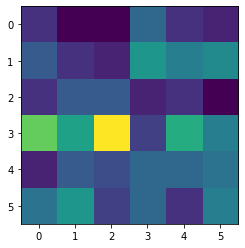

1200/1200 [==============================] - 1s 569us/sample


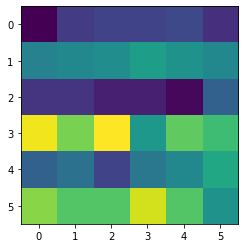

[200. 200. 200. 200. 200. 200.]
Train on 1200 samples, validate on 300 samples
Epoch 46/50
1200/1200 [==============================] - 9s 7ms/sample - loss: 2.5952 - acc: 0.1767 - val_loss: 2.2794 - val_acc: 0.1633
Epoch 47/50
1200/1200 [==============================] - 7s 6ms/sample - loss: 2.5421 - acc: 0.1758 - val_loss: 2.2796 - val_acc: 0.1633
Epoch 48/50
1200/1200 [==============================] - 7s 6ms/sample - loss: 2.6014 - acc: 0.1558 - val_loss: 2.2798 - val_acc: 0.1633
Epoch 49/50
1200/1200 [==============================] - 8s 6ms/sample - loss: 2.6111 - acc: 0.1525 - val_loss: 2.2801 - val_acc: 0.1633
Epoch 50/50
300/300 [==============================] - 0s 1ms/sample


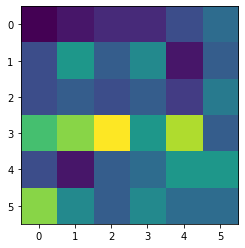

1200/1200 [==============================] - 1s 637us/sample


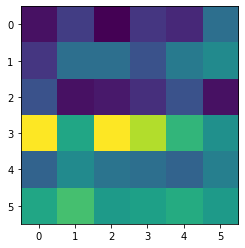

In [9]:
#add recurrent dropout to add noise to duration
desc = "trial"
log_dir = os.path.join(
    "logs",
    "betterSampling",
    desc
)
model_dir = os.path.join(
    "pickle",
    "save"
)

train_n = 200
val_n  = 50
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
epochs = 5
iterations = 10
learn_rate = 0.001
module.train(iterations, learn_rate, train_n, val_n, seconds, samplerate,
                countriesOfInterest, enc, epochs, tensorboard_callback, model_dir,
                model)